# Task- 1 Dataframe (CSV File)

In [2]:
import pandas as pd

df = pd.read_csv('supermarket_sales.csv')
print("Data loaded successfully!")
print(f"Shape: {df.shape}")

Data loaded successfully!
Shape: (1000, 17)


In [3]:
# Display first few rows
print("First 5 rows:")
print(df.head())

print("\n" + "="*50 + "\n")

# Display basic information
print("Dataset Info:")
print(df.info())

print("\n" + "="*50 + "\n")

# Display statistical summary
print("Statistical Summary:")
print(df.describe())

First 5 rows:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.14

In [4]:
# Select specific columns
# Single column
print("Column names:", df.columns.tolist())
print("\n" + "="*50 + "\n")

# Assuming common supermarket columns exist, adjust based on actual CSV
# Select first column as example
first_col = df.iloc[:, 0]
print(f"First column ({df.columns[0]}):")
print(first_col.head())

print("\n" + "="*50 + "\n")

# Select multiple columns (first 3 columns as example)
selected_cols = df.iloc[:, :3]
print("First 3 columns:")
print(selected_cols.head())

Column names: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


First column (Invoice ID):
0    750-67-8428
1    226-31-3081
2    631-41-3108
3    123-19-1176
4    373-73-7910
Name: Invoice ID, dtype: str


First 3 columns:
    Invoice ID Branch       City
0  750-67-8428   Alex     Yangon
1  226-31-3081   Giza  Naypyitaw
2  631-41-3108   Alex     Yangon
3  123-19-1176   Alex     Yangon
4  373-73-7910   Alex     Yangon


In [5]:
# Add new columns
df['Row_Number'] = range(1, len(df) + 1)

# Get first numeric column
numeric_col = df.select_dtypes(include=['number']).columns[0]
df['Discount_10_Percent'] = df[numeric_col] * 0.1  # 10% of first numeric column

print("New columns added!")
print(f"Updated shape: {df.shape}")
print("\nDataframe with new columns:")
print(df.head())

New columns added!
Updated shape: (1000, 19)

Dataframe with new columns:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 

In [6]:
# Define a custom function
def categorize_value(x):
    if pd.isna(x):
        return 'Unknown'
    elif x < 100:
        return 'Low'
    elif x < 500:
        return 'Medium'
    else:
        return 'High'

# Apply function to first numeric column
numeric_col = df.select_dtypes(include=['number']).columns[0]
df['Category'] = df[numeric_col].apply(categorize_value)

print(f"Applied categorization to {numeric_col}:")
print(df[['Row_Number', numeric_col, 'Category']].head(10))

Applied categorization to Unit price:
   Row_Number  Unit price Category
0           1       74.69      Low
1           2       15.28      Low
2           3       46.33      Low
3           4       58.22      Low
4           5       86.31      Low
5           6       85.39      Low
6           7       68.84      Low
7           8       73.56      Low
8           9       36.26      Low
9          10       54.84      Low


In [7]:
# Apply function to multiple columns
numeric_cols = df.select_dtypes(include=['number']).columns[:3]

# Apply square root to multiple columns
df_transformed = df[numeric_cols].apply(lambda x: x ** 0.5)
df_transformed.columns = [f'{col}_sqrt' for col in numeric_cols]

print("Applied square root to numeric columns:")
print(df_transformed.head())

# Alternative: using applymap (element-wise operation)
print("\n" + "="*50 + "\n")
print("Original values (first 3 numeric columns):")
print(df[numeric_cols].head())

Applied square root to numeric columns:
   Unit price_sqrt  Quantity_sqrt  Tax 5%_sqrt
0         8.642338       2.645751     5.112876
1         3.908964       2.236068     1.954482
2         6.806614       2.645751     4.026847
3         7.630203       2.828427     4.825764
4         9.290318       2.645751     5.496226


Original values (first 3 numeric columns):
   Unit price  Quantity   Tax 5%
0       74.69         7  26.1415
1       15.28         5   3.8200
2       46.33         7  16.2155
3       58.22         8  23.2880
4       86.31         7  30.2085


In [8]:
# Delete columns
print(f"Columns before deletion: {df.shape[1]}")
print(f"Column names: {df.columns.tolist()}")

# Delete the columns we added earlier
df_cleaned = df.drop(['Row_Number', 'Discount_10_Percent', 'Category'], axis=1)

print(f"\nColumns after deletion: {df_cleaned.shape[1]}")
print(f"Column names: {df_cleaned.columns.tolist()}")
print("\nDataframe after deletion:")
print(df_cleaned.head())

Columns before deletion: 20
Column names: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Row_Number', 'Discount_10_Percent', 'Category']

Columns after deletion: 17
Column names: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

Dataframe after deletion:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       

In [9]:
# Write dataframe to different file formats

# 1. Write to CSV
df_cleaned.to_csv('output_data.csv', index=False)
print("✓ Data written to 'output_data.csv'")

# 2. Write to Excel (if openpyxl is available)
try:
    df_cleaned.to_excel('output_data.xlsx', index=False)
    print("✓ Data written to 'output_data.xlsx'")
except ImportError:
    print("! Excel export requires 'openpyxl' package")

# 3. Write to JSON
df_cleaned.to_json('output_data.json', orient='records', indent=2)
print("✓ Data written to 'output_data.json'")

print(f"\nTotal rows written: {len(df_cleaned)}")

✓ Data written to 'output_data.csv'
! Excel export requires 'openpyxl' package
✓ Data written to 'output_data.json'

Total rows written: 1000


# Task 2: Drawing shapes (shapes + axes + grid)

Text(0.5, 0.98, '2x2 Subplots Example')

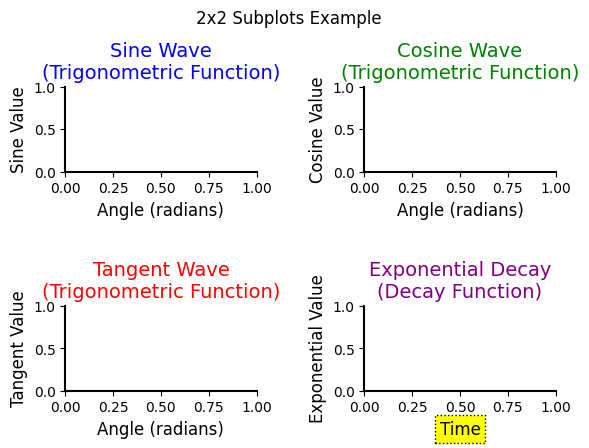

In [1]:
# Plot four subplots in a 2x2 grid using matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Create an empty subplots grid
fig, axs = plt.subplots(2, 2)
#Task1 - Customize the font and colors]
#Task2 - Text Wrapping for long titles
axs[0, 0].set_title('Sine Wave\n(Trigonometric Function)', fontsize=14, color='blue')
axs[0, 1].set_title('Cosine Wave\n(Trigonometric Function)', fontsize=14, color='green')
axs[1, 0].set_title('Tangent Wave\n(Trigonometric Function)', fontsize=14, color='red')
axs[1, 1].set_title('Exponential Decay\n(Decay Function)', fontsize=14, color='purple')

axs[0,0].set_xlabel('Angle (radians)', fontsize=12)
axs[0,0].set_ylabel('Sine Value', fontsize=12)
axs[0,1].set_xlabel('Angle (radians)', fontsize=12)
axs[0,1].set_ylabel('Cosine Value', fontsize=12)
axs[1,0].set_xlabel('Angle (radians)', fontsize=12)
axs[1,0].set_ylabel('Tangent Value', fontsize=12)
axs[1,1].set_ylabel('Exponential Value', fontsize=12)

#Task3 - Positioning and Spacing
plt.subplots_adjust(hspace=0.5, wspace=0.3, top=0.9, bottom=0.1, left=0.1, right=0.9)

#Task4 - Background and box styles = in plot [1,1] set a dotted border on xlabel and background of yellow
axs[1,1].set_xlabel('Time', fontsize=12, bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='square', linestyle='dotted'))

#Task5 - Customizing spines
for ax in axs.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

fig.tight_layout(pad=3.0)
fig.suptitle('2x2 Subplots Example')

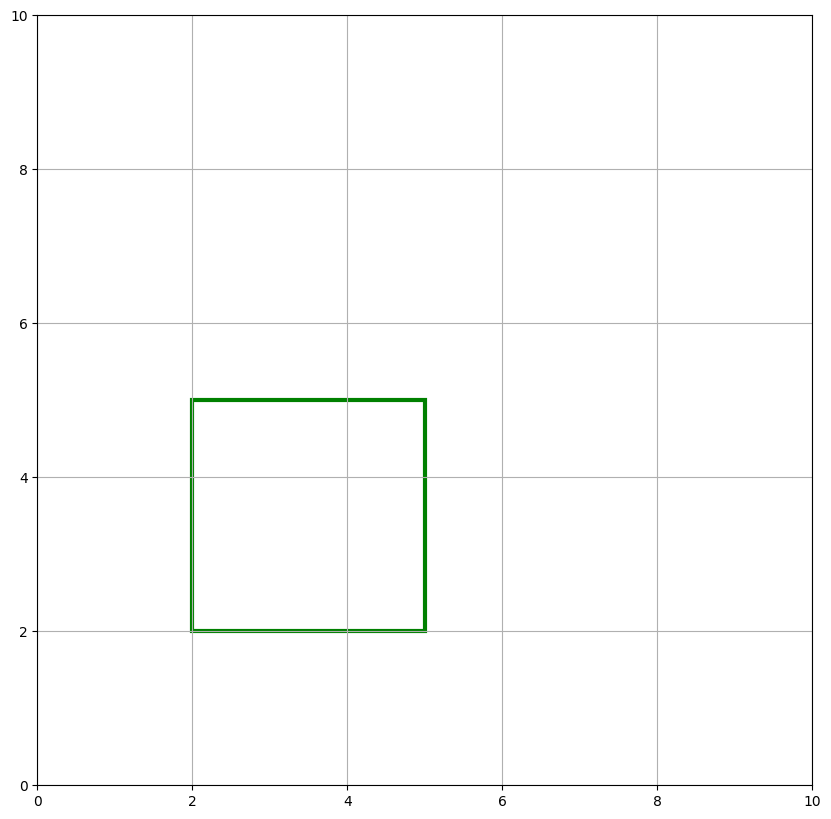

In [2]:
#Make a plot of 10x10 size and plot a green box 
fig2, ax2 = plt.subplots(figsize=(10, 10))

# Create a green box with no background just green border
ax2.add_patch(plt.Rectangle((2, 2), 3, 3, fill=False, edgecolor='green', linewidth=3))
# Set limits and grid
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.grid(True)

# Task-3: Shapes using patches(ticks and tick labels(minor and major))

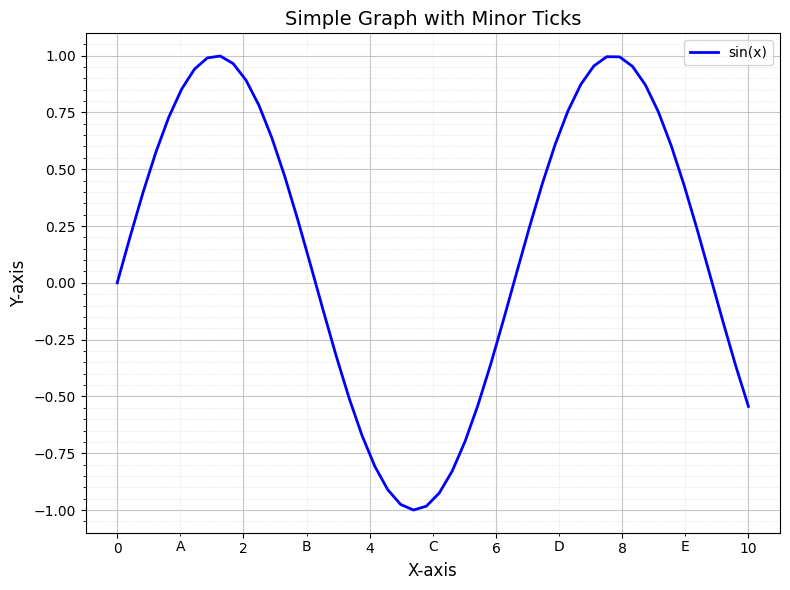

In [3]:
# Simple graph with minor ticks using object-oriented approach
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 50)
y = np.sin(x)

# Create plot using objects
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, color='blue', linewidth=2, label='sin(x)')

# Add title and labels
ax.set_title('Simple Graph with Minor Ticks', fontsize=14)
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)

# Enable minor ticks
ax.minorticks_on()
ax.set_xticks([1,3,5,7,9],minor=True)
ax.set_xticklabels(['A','B','C','D','E'],minor=True)

# Customize grid to show both major and minor ticks
ax.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.7)
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

ax.legend()
plt.tight_layout()
plt.show()

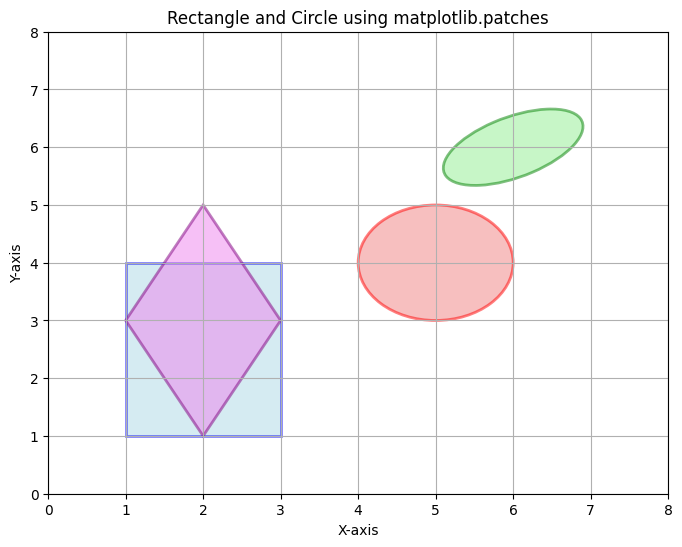

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a rectangle patch
rect = patches.Rectangle((1, 1), 2, 3, linewidth=2, edgecolor='blue', facecolor='lightblue', alpha=0.5)
ax.add_patch(rect)

# Create a circle patch
circle = patches.Circle((5, 4), 1, linewidth=2, edgecolor='red', facecolor='lightcoral', alpha=0.5)
ax.add_patch(circle)

ellipse = patches.Ellipse((6,6), width = 2 , height = 1, angle = 30 , linewidth = 2, edgecolor = 'Green', facecolor = 'lightgreen', alpha = 0.5)
ax.add_patch(ellipse)

polygon = patches.Polygon([[1,3], [2,5] , [3,3] , [2,1]], closed = True, linewidth=2, edgecolor='purple', facecolor='violet', alpha=0.5)
ax.add_patch(polygon)

# Set limits and labels
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Rectangle and Circle using matplotlib.patches')

# Add grid
ax.grid(True)

plt.show()

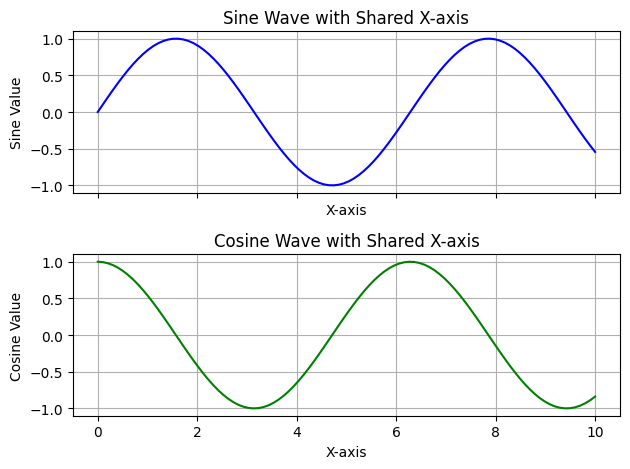

In [ ]:
#Implement sharex and sharey in subplots

import matplotlib.pyplot as plt
import numpy as np

#Create a subpolots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
ax1.plot(np.linspace(0,10,100), np.sin(np.linspace(0,10,100)), color='blue')
ax1.set_title('Sine Wave with Shared X-axis')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Sine Value')
ax1.grid(True)

ax2.plot(np.linspace(0,10,100), np.cos(np.linspace(0,10,100)), color='green')
ax2.set_title('Cosine Wave with Shared X-axis')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Cosine Value')
ax2.grid(True)

plt.tight_layout()
plt.show()

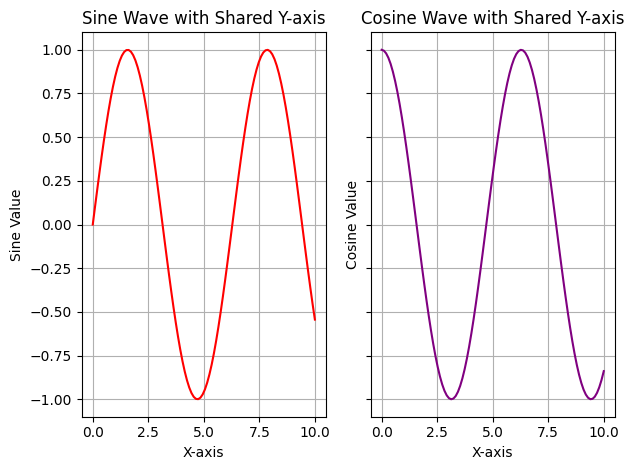

In [11]:
#Share y axis on same plot
fig, (ax3, ax4) = plt.subplots(1,2,sharey=True)
ax3.plot(np.linspace(0,10,100), np.sin(np.linspace(0,10,100)), color='red')
ax3.set_title('Sine Wave with Shared Y-axis')
ax3.set_xlabel('X-axis')
ax3.set_ylabel('Sine Value')
ax3.grid(True)

ax4.plot(np.linspace(0,10,100), np.cos(np.linspace(0,10,100)), color='purple')
ax4.set_title('Cosine Wave with Shared Y-axis')
ax4.set_xlabel('X-axis')
ax4.set_ylabel('Cosine Value')
ax4.grid(True)

plt.tight_layout()
plt.show()

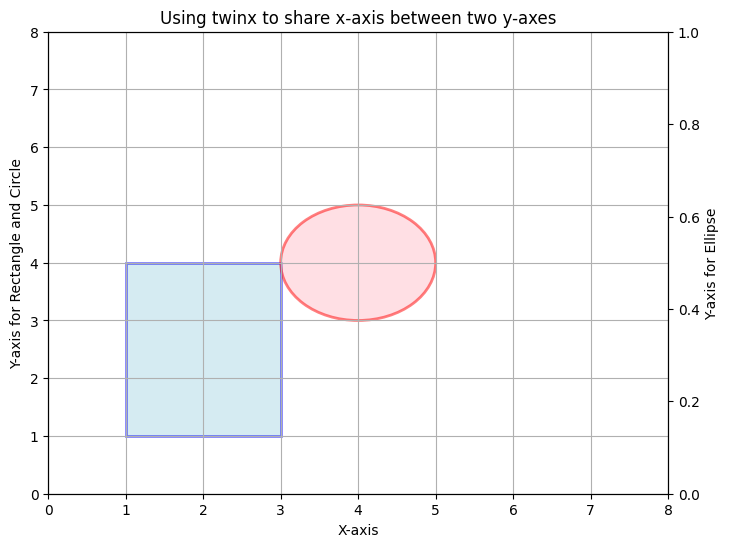

In [13]:
#Implement twinx and twiny
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
# Create a rectangle patch
rect = patches.Rectangle((1, 1), 2, 3, linewidth=2, edgecolor='blue', facecolor='lightblue', alpha=0.5)
ax.add_patch(rect)
# Create a circle patch
circle = patches.Circle((4, 4), 1, linewidth=2, edgecolor='red', facecolor='pink', alpha=0.5)
ax.add_patch(circle)
# Create a twin Axes sharing the xaxis
ax2 = ax.twinx()
# Create an ellipse patch on the twin axis
ellipse = patches.Ellipse((6,6), width = 2 , height = 1, angle = 30 , linewidth = 2, edgecolor = 'Green', facecolor = 'lightgreen', alpha = 0.5)
ax2.add_patch(ellipse)

# Set limits and labels
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis for Rectangle and Circle')
ax2.set_ylabel('Y-axis for Ellipse')
ax.set_title('Using twinx to share x-axis between two y-axes')
# Add grid
ax.grid(True)
ax2.grid(False)

plt.show()

# Task-4: Inset plotting (plot + legend + title)

/tmp/ipykernel_1772/1277751125.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(


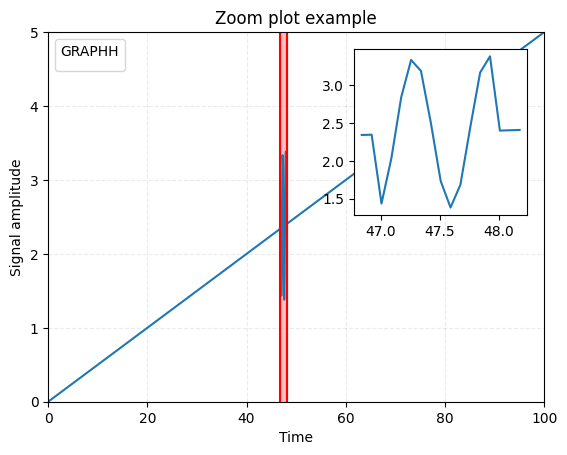

In [12]:
#Insert a zoom plot

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes,mark_inset

x = np.linspace(0,500,6000)
y = 0.05 * x


for i in range(len(x)):
    if 47 < x[i] < 48:
        y[i] += np.sin(10*x[i])

fig,ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(0,100)
ax.set_ylim(0,5)
ax.set_xlabel("Time")
ax.set_ylabel("Signal amplitude")
ax.set_title("Zoom plot example")
ax.grid(True, linestyle='--', alpha=0.25)
x1,x2 = 46.8,48.2
ax.axvline(x1,color="Red")
ax.axvline(x2,color="red")
ax.axvspan(x1,x2, color='red', alpha=0.25)
axins = inset_axes(
    ax,
    width = "35%",
    height="45%",
    loc="upper right",
    borderpad=1.2
)

xy_mask = (x> x1) & (x < x2)
x_cord = x[xy_mask]
y_cord = y[xy_mask]

axins.plot(x_cord,y_cord)

ax.legend(
    loc = 'upper left',
    bbox_to_anchor= None,
    ncol=1,
    fontsize=None,
    title="GRAPHH",
)

# Task-5 working with date and time data

In [9]:
from datetime import datetime, UTC
from zoneinfo import ZoneInfo
import pandas as pd

#using datetime
timenow = datetime.now()
print("Current Date and Time : ", timenow)

#using UTC and IST
utc_now = datetime.now(UTC)
utc_ist = utc_now.astimezone(ZoneInfo("Asia/Kolkata"))
print("Current UTC Date and Time : ", utc_now)
print("Current IST Date and Time : ", utc_ist)

#using pandas
print("Using pandas UTC - ",pd.Timestamp.now(tz='UTC'))
print("Using pandas IST - ",pd.Timestamp.now(tz='Asia/Kolkata'))

Current Date and Time :  2026-02-03 09:18:34.557305
Current UTC Date and Time :  2026-02-03 09:18:34.557452+00:00
Current IST Date and Time :  2026-02-03 14:48:34.557452+05:30
Using pandas UTC -  2026-02-03 09:18:34.557805+00:00
Using pandas IST -  2026-02-03 14:48:34.557956+05:30


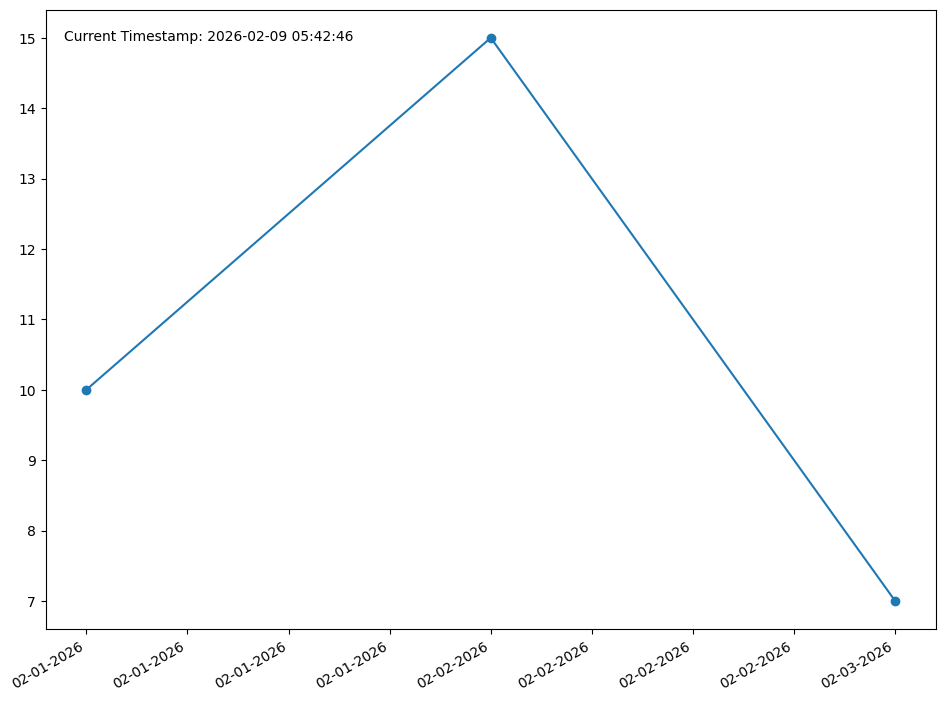

In [6]:
# x = [2026-02-01, 2026-02-02, 2026-02-03]

from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

x = [datetime.strptime("2026-02-01", "%Y-%m-%d"),
    datetime.strptime("2026-02-02", "%Y-%m-%d"),
    datetime.strptime("2026-02-03", "%Y-%m-%d")]

y = [10, 15, 7]

fig, ax = plt.subplots(figsize=(10,8))

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))

ax.text(0.02, 0.95, f"Current Timestamp: {timestamp}", transform=ax.transAxes)

plt.tight_layout()
fig.autofmt_xdate()
ax.plot(x, y, marker='o')


# Task-6: Pie and Donut

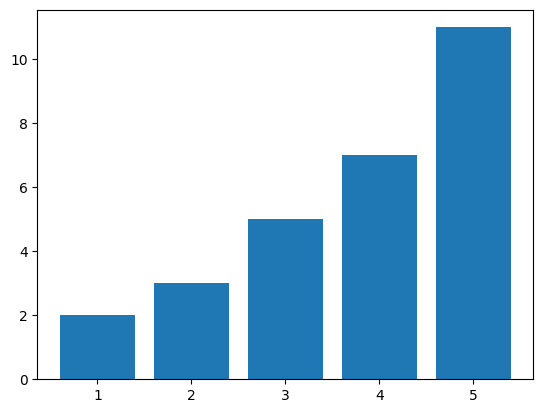

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
x =[1,2,3,4,5]
y =[2,3,5,7,11]

fig,ax = plt.subplots()
ax.bar(x,y)
plt.show()

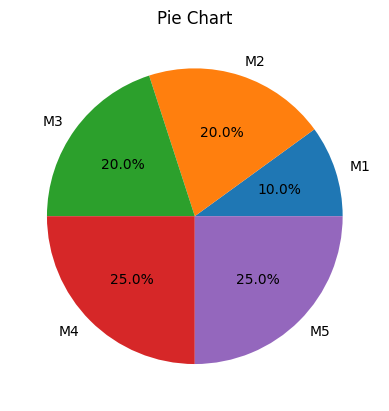

In [18]:
import matplotlib.pyplot as plt

values = [10, 20, 20, 25, 25]
labels = ['M1', 'M2', 'M3', 'M4', 'M5']

plt.figure()
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Pie Chart")

plt.show()

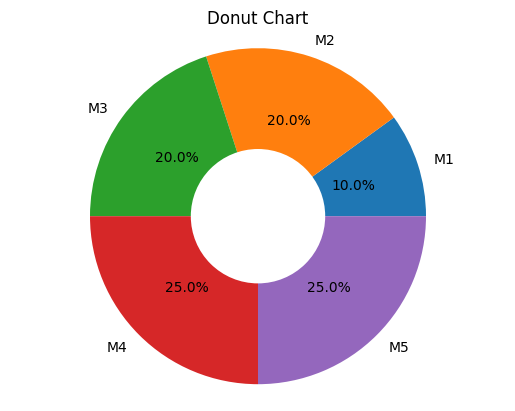

In [4]:
import matplotlib.pyplot as plt

values = [10, 20, 20, 25, 25]
labels = ['M1', 'M2', 'M3', 'M4', 'M5']

plt.figure()

plt.pie(values, labels=labels, autopct='%1.1f%%')

centre_circle = plt.Circle((0, 0), 0.40, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Donut Chart")
plt.axis('equal') 

plt.show()

<Figure size 640x480 with 0 Axes>

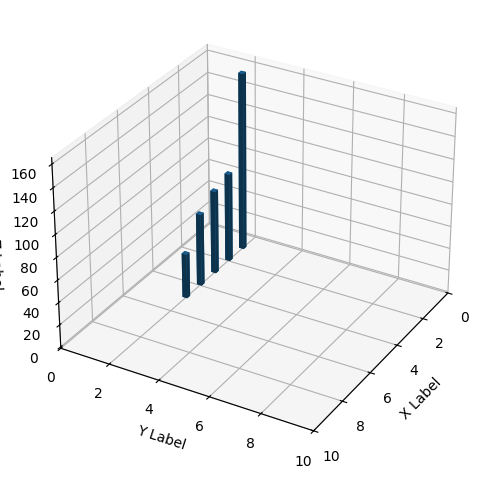

In [20]:
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure()
ax = p3.Axes3D(fig)

x = [1,2,3,4,5]
x = np.array(x)
z_base = 2
y = 2
z = [160,80,75,65,40]
dx,dy,dz = 0.2,0.2,z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x,y,z_base,dx,dy,dz)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.view_init(elev=30, azim=30)
plt.tight_layout()
plt.show()

# Task-7: 3D plotting (Bar)

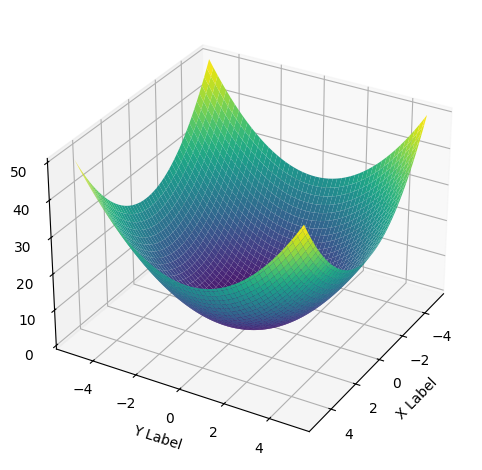

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(x,y)
Z = X**2 + Y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.plot_surface(X,Y,Z,cmap='viridis')
ax.view_init(elev=30, azim=30)
plt.tight_layout()
plt.show()